In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('telecom.csv')
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7853-GVUDZ,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.15,20.15,Yes
1,6893-ODYYE,Male,0,No,No,50,Yes,No,Fiber optic,Yes,...,Yes,Yes,No,No,One year,Yes,Credit card (automatic),90.10,4549.45,No
2,0486-HECZI,Male,0,Yes,No,55,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,96.75,5238.9,Yes
3,8972-HJWNV,Female,1,Yes,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.55,646.85,Yes
4,9317-WZPGV,Female,1,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),79.75,159.4,Yes


In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# "TotalCharges" dtype is object, but we must check datapoints and if necessery change to numeric values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
customerID          6000 non-null object
gender              6000 non-null object
SeniorCitizen       6000 non-null int64
Partner             6000 non-null object
Dependents          6000 non-null object
tenure              6000 non-null int64
PhoneService        6000 non-null object
MultipleLines       6000 non-null object
InternetService     6000 non-null object
OnlineSecurity      6000 non-null object
OnlineBackup        6000 non-null object
DeviceProtection    6000 non-null object
TechSupport         6000 non-null object
StreamingTV         6000 non-null object
StreamingMovies     6000 non-null object
Contract            6000 non-null object
PaperlessBilling    6000 non-null object
PaymentMethod       6000 non-null object
MonthlyCharges      6000 non-null float64
TotalCharges        6000 non-null object
Churn               6000 non-null object
dtypes: float64(1), int64(2), obj

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges']

0         20.15
1       4549.45
2       5238.90
3        646.85
4        159.40
         ...   
5995     165.40
5996    7517.70
5997     493.65
5998    1940.85
5999    7210.85
Name: TotalCharges, Length: 6000, dtype: float64

In [9]:
df['TotalCharges'].isnull().sum()

10

In [10]:
# After some changes in "TotalCharges" we have some null values and we replace it by median of "TotalCharges"

In [11]:
total_charges_median = df['TotalCharges'].median()
total_charges_median

1413.6

In [12]:
df['TotalCharges'].fillna(total_charges_median, inplace=True)
df['TotalCharges'].isnull().sum()

0

In [13]:
# y --> target values

In [14]:
y = pd.DataFrame(df['Churn'].values)
y.describe()

,0
count,6000
unique,2
top,No
freq,4417


In [15]:
y

,0
0,Yes
1,No
2,Yes
3,Yes
4,Yes
...,...
5995,Yes
5996,No
5997,No
5998,No


In [16]:
y.replace(to_replace='Yes', value=1, inplace=True)
y.replace(to_replace='No',  value=0, inplace=True)
y

,0
0,1
1,0
2,1
3,1
4,1
...,...
5995,1
5996,0
5997,0
5998,0


In [17]:
# AS "Churn" is our target and we already split it and save as y, we can remove it,
# "customerID" feature has not meaningful data for us, so we drop it also

In [18]:
df = df.drop(['Churn', 'customerID'], axis='columns')
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.15,20.15
1,Male,0,No,No,50,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,No,No,One year,Yes,Credit card (automatic),90.10,4549.45
2,Male,0,Yes,No,55,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,96.75,5238.90
3,Female,1,Yes,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.55,646.85
4,Female,1,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),79.75,159.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Male,1,No,No,2,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,74.70,165.40
5996,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),103.95,7517.70
5997,Female,1,No,No,7,Yes,No,DSL,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,64.95,493.65
5998,Male,0,Yes,No,70,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.15,1940.85


In [19]:
df['gender'].describe()

count     6000
unique       2
top       Male
freq      3022
Name: gender, dtype: object

In [20]:
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,6000,6000.000000,6000,6000,6000.000000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000.000000,6000.000000
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN
freq,3022,NaN,3111,4196,NaN,5419,2888,2644,2968,2616,2642,2953,2381,2383,3303,3558,2022,NaN,NaN
mean,NaN,0.164167,NaN,NaN,32.474500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.926142,2292.978150
std,NaN,0.370458,NaN,NaN,24.580963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.043373,2263.560092
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.800000,411.975000
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.525000,1413.600000
75%,NaN,0.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.800000,3817.162500


In [21]:
# AS we make all changes we needed for numeric features, we can use "get_dummies" for categorical data 

In [22]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,20.15,20.15,1,0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,0,50,90.10,4549.45,0,1,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,0,55,96.75,5238.90,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
3,1,7,84.55,646.85,1,0,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0
4,1,2,79.75,159.40,1,0,1,0,1,0,...,1,1,0,0,0,1,1,0,0,0


In [23]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 45 columns):
SeniorCitizen                              6000 non-null int64
tenure                                     6000 non-null int64
MonthlyCharges                             6000 non-null float64
TotalCharges                               6000 non-null float64
gender_Female                              6000 non-null uint8
gender_Male                                6000 non-null uint8
Partner_No                                 6000 non-null uint8
Partner_Yes                                6000 non-null uint8
Dependents_No                              6000 non-null uint8
Dependents_Yes                             6000 non-null uint8
PhoneService_No                            6000 non-null uint8
PhoneService_Yes                           6000 non-null uint8
MultipleLines_No                           6000 non-null uint8
MultipleLines_No phone service             6000 non-null uint8
Multipl

In [24]:
# "MinMaxScaler" for scalling numeric features (4 numeric features)

In [25]:
features = df_dummies.columns.values
features.shape
mms = MinMaxScaler()
X = pd.DataFrame(mms.fit_transform(df_dummies), columns=features)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.013889,0.018905,0.000156,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.694444,0.714925,0.522808,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.763889,0.781095,0.602366,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.097222,0.659701,0.072473,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.027778,0.611940,0.016224,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [26]:
# We split data and this splitted parts we will use in our 3 models

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier


In [52]:
knn = KNeighborsClassifier(n_neighbors=3)

In [53]:
knn.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [54]:
knn.score(X_train,y_train)

0.86125

In [55]:
knn.score(X_test,y_test)

0.7433333333333333

In [56]:
n_neighbors = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    n_neighbors.append([i,knn.score(X_train, y_train), knn.score(X_test, y_test)])
n_neighbors

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

[[1, 0.9975, 0.7258333333333333],
 [2, 0.8602083333333334, 0.7633333333333333],
 [3, 0.86125, 0.7433333333333333],
 [4, 0.8375, 0.7725],
 [5, 0.8325, 0.7658333333333334],
 [6, 0.825, 0.7775],
 [7, 0.81875, 0.7675],
 [8, 0.813125, 0.7825],
 [9, 0.814375, 0.785],
 [10, 0.8139583333333333, 0.7866666666666666],
 [11, 0.8070833333333334, 0.7891666666666667],
 [12, 0.8104166666666667, 0.7916666666666666],
 [13, 0.8070833333333334, 0.7883333333333333],
 [14, 0.81, 0.7983333333333333],
 [15, 0.805, 0.7933333333333333],
 [16, 0.8075, 0.795],
 [17, 0.8052083333333333, 0.7925],
 [18, 0.8047916666666667, 0.7983333333333333],
 [19, 0.799375, 0.7866666666666666],
 [20, 0.8022916666666666, 0.7991666666666667],
 [21, 0.7997916666666667, 0.7925],
 [22, 0.8025, 0.7991666666666667],
 [23, 0.7989583333333333, 0.7933333333333333],
 [24, 0.8022916666666666, 0.8008333333333333],
 [25, 0.8, 0.8025],
 [26, 0.8016666666666666, 0.7983333333333333],
 [27, 0.7985416666666667, 0.8],
 [28, 0.7983333333333333, 0.7991

In [57]:
df_n_neighbors = pd.DataFrame(n_neighbors)
df_n_neighbors.head()

,0,1,2
0,1,0.997500,0.725833
1,2,0.860208,0.763333
2,3,0.861250,0.743333
3,4,0.837500,0.772500
4,5,0.832500,0.765833


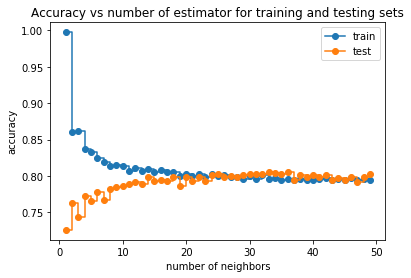

In [58]:
fig, ax = plt.subplots()
ax.set_xlabel('number of neighbors')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs number of estimator for training and testing sets')
ax.plot(df_n_neighbors[0], df_n_neighbors[1], marker='o', label='train', drawstyle='steps-post')
ax.plot(df_n_neighbors[0], df_n_neighbors[2], marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [59]:
df_n_neighbors[df_n_neighbors[2]==df_n_neighbors[2].max()][0]
ideal_n_neighbors = int(df_n_neighbors[df_n_neighbors[2]==df_n_neighbors[2].max()][0][:1])
ideal_n_neighbors

33

In [60]:
knn = KNeighborsClassifier(n_neighbors=ideal_n_neighbors)

In [61]:
knn.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=33)

In [62]:
knn.score(X_train,y_train)

0.795625

In [63]:
knn.score(X_test,y_test)

0.8058333333333333

In [64]:
y_pred_KNN = knn.predict(X_test)
y_pred_KNN

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [65]:
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred_KNN, target_names=target_names))

              precision    recall  f1-score   support

          No       0.87      0.88      0.87       914
         Yes       0.59      0.58      0.59       286

    accuracy                           0.81      1200
   macro avg       0.73      0.73      0.73      1200
weighted avg       0.80      0.81      0.81      1200



In [66]:
pwd

'C:\\Users\\Acer\\ML\\Practice 5 Logistic Regression, Decision Trees'

In [ ]:
# as we will create 3 models, we need to save their statistics for further comparisons. 
# models_stat will contain * model name, *train score, *test score

In [37]:
models_stat = []

### Logistic Regression

In [29]:
lr = LogisticRegression(random_state=42,
                       n_jobs=-1,
                       penalty='l2')
lr.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(n_jobs=-1, random_state=42)

In [30]:
y_pred = pd.DataFrame(lr.predict(X_test))
lr.score(X_train, y_train)

0.81

In [31]:
lr.score(X_test, y_test)

0.8033333333333333

In [32]:
y_pred_LR = lr.predict(X_test)
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred_LR, target_names=target_names))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87       914
         Yes       0.60      0.51      0.55       286

    accuracy                           0.80      1200
   macro avg       0.73      0.70      0.71      1200
weighted avg       0.79      0.80      0.80      1200



In [38]:
models_stat.append(["Logistic_regression", lr.score(X_train, y_train), lr.score(X_test, y_test) ])
models_stat

[['Logistic_regression', 0.81, 0.8033333333333333]]

## DecisionTree

In [ ]:
# we create initial DecisionTreeClassifier and than we will tune parameters

In [39]:
clf_dt = DecisionTreeClassifier(random_state=42,class_weight='balanced')
clf_dt = clf_dt.fit(X_train, y_train)

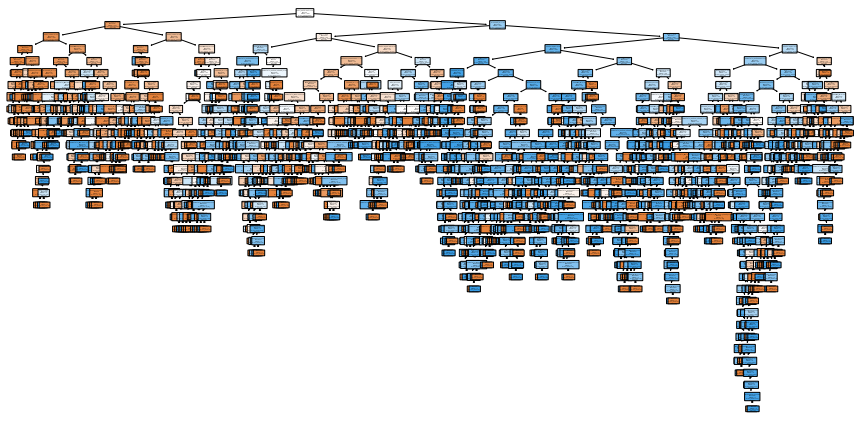

In [40]:
%matplotlib inline
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt, filled=True, rounded=True, class_names=['No', 'Yes'], feature_names=features);

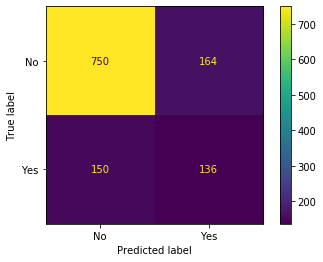

In [41]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=['No', 'Yes'])

In [42]:
y_test[0].value_counts()

0    914
1    286
Name: 0, dtype: int64

In [ ]:
# data is not balanced, but tune parameter "class_weight='balanced'" make no sense

In [45]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determines values for alpha
print(path)

ccp_alphas = path.ccp_alphas # extract different values for alpha
print(ccp_alphas)

ccp_alphas = ccp_alphas[:-1] # exclude maximum value for alpha
# note: we omit the maximum value for alpha with ccp_alphas = ccp_alphas[:-1]
# because it would prune all leaves, leaving us with only a root instead of a tree

clf_dts = []

# now create one decision tree per value for alpha and store it in the array

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

clf_dts

{'ccp_alphas': array([0.00000000e+00, 2.08333333e-05, 4.89267677e-05, 5.20833333e-05,
       5.35714286e-05, 6.94444444e-05, 6.94444444e-05, 6.94444444e-05,
       6.94444444e-05, 6.94444444e-05, 9.25925926e-05, 1.11111111e-04,
       1.11111111e-04, 1.11111111e-04, 1.21527778e-04, 1.25000000e-04,
       1.26262626e-04, 1.27314815e-04, 1.30718954e-04, 1.35658915e-04,
       1.37500000e-04, 1.37527233e-04, 1.38275693e-04, 1.38888889e-04,
       1.48148148e-04, 1.48809524e-04, 1.53846154e-04, 1.54320988e-04,
       1.55723906e-04, 1.56250000e-04, 1.56250000e-04, 1.56250000e-04,
       1.64697972e-04, 1.65662915e-04, 1.66666667e-04, 1.66666667e-04,
       1.66666667e-04, 1.73611111e-04, 1.73611111e-04, 1.73611111e-04,
       1.73611111e-04, 1.73611111e-04, 1.73611111e-04, 1.73611111e-04,
       1.77469136e-04, 1.78571429e-04, 1.78571429e-04, 1.78571429e-04,
       1.78571429e-04, 1.78571429e-04, 1.78571429e-04, 1.78571429e-04,
       1.82291667e-04, 1.82291667e-04, 1.82291667e-04, 1.82291

[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(ccp_alpha=2.083333333333326e-05, random_state=42),
 DecisionTreeClassifier(ccp_alpha=4.8926767676767694e-05, random_state=42),
 DecisionTreeClassifier(ccp_alpha=5.208333333333333e-05, random_state=42),
 DecisionTreeClassifier(ccp_alpha=5.357142857142876e-05, random_state=42),
 DecisionTreeClassifier(ccp_alpha=6.944444444444443e-05, random_state=42),
 DecisionTreeClassifier(ccp_alpha=6.944444444444443e-05, random_state=42),
 DecisionTreeClassifier(ccp_alpha=6.944444444444443e-05, random_state=42),
 DecisionTreeClassifier(ccp_alpha=6.944444444444443e-05, random_state=42),
 DecisionTreeClassifier(ccp_alpha=6.944444444444443e-05, random_state=42),
 DecisionTreeClassifier(ccp_alpha=9.259259259259257e-05, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.00011111111111111109, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.00011111111111111112, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0001111111111111111

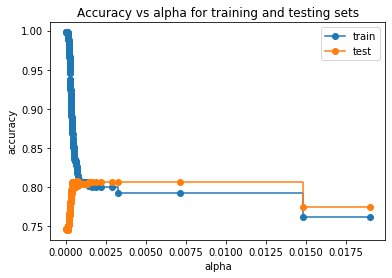

In [47]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [ ]:
# from plot we can see that target alphas are in range 0.000 - 0.0025
# we chose random alpha for example 0.0012 to show what`s going on with this parameter

[0.79583333 0.77916667 0.78125    0.79791667 0.80208333 0.8
 0.80625    0.78333333 0.78333333 0.79166667]


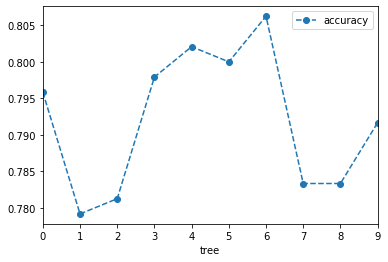

In [48]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0012)

# now use 10-fold cross val
scores = cross_val_score(clf_dt, X_train, y_train, cv = 10)
print(scores)

df = pd.DataFrame(data={'tree':range(10), 'accuracy':scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

In [ ]:
# we run all alphas, create "alpha_results" dataframe where we will save
# *alphas, *mean_accuracy, *standard deviation for each alpha
# and than show "mean_accuracy" plot

In [ ]:
# Note: this process may take some minutes

[0.69791667 0.73125    0.73333333 0.69791667 0.73333333 0.74375
 0.7625     0.75208333 0.71875    0.74791667] scores
[0.69791667 0.73125    0.73333333 0.69791667 0.73333333 0.74375
 0.7625     0.75208333 0.71875    0.74791667] scores
[0.69791667 0.73125    0.73333333 0.69791667 0.73333333 0.74375
 0.7625     0.75208333 0.71875    0.74791667] scores
[0.69791667 0.73125    0.73333333 0.69791667 0.73333333 0.74375
 0.7625     0.75208333 0.71875    0.74791667] scores
[0.69791667 0.73125    0.73333333 0.69791667 0.73333333 0.74375
 0.7625     0.75208333 0.71875    0.74791667] scores
[0.69791667 0.73125    0.73333333 0.69791667 0.73333333 0.74375
 0.7625     0.75208333 0.71875    0.74791667] scores
[0.69791667 0.73125    0.73333333 0.69791667 0.73333333 0.74375
 0.7625     0.75208333 0.71875    0.74791667] scores
[0.69791667 0.73125    0.73333333 0.69791667 0.73333333 0.74375
 0.7625     0.75208333 0.71875    0.74791667] scores
[0.69791667 0.73125    0.73333333 0.69791667 0.73333333 0.74375


[0.70416667 0.7375     0.74166667 0.69791667 0.75625    0.74375
 0.77708333 0.75625    0.725      0.74583333] scores
[0.70416667 0.7375     0.74583333 0.70208333 0.75625    0.74375
 0.77708333 0.75625    0.725      0.74583333] scores
[0.70416667 0.7375     0.74583333 0.70208333 0.75625    0.74375
 0.77708333 0.75625    0.725      0.74583333] scores
[0.70416667 0.7375     0.74583333 0.70208333 0.75625    0.74375
 0.77708333 0.75625    0.725      0.74583333] scores
[0.70416667 0.7375     0.74583333 0.70208333 0.75625    0.74375
 0.77708333 0.75625    0.725      0.74583333] scores
[0.71041667 0.7375     0.74583333 0.70208333 0.75625    0.74375
 0.77708333 0.75625    0.725      0.74583333] scores
[0.71041667 0.7375     0.74583333 0.70208333 0.75625    0.74375
 0.77708333 0.75625    0.725      0.74583333] scores
[0.71041667 0.7375     0.74583333 0.70208333 0.75625    0.74375
 0.77708333 0.75625    0.725      0.74791667] scores
[0.71041667 0.7375     0.74583333 0.70208333 0.75625    0.74375


[0.73125    0.75208333 0.76041667 0.70625    0.77916667 0.75416667
 0.78958333 0.73541667 0.73541667 0.74583333] scores
[0.73125    0.75208333 0.76041667 0.70625    0.77916667 0.75625
 0.78958333 0.73541667 0.73541667 0.74583333] scores
[0.73125    0.75208333 0.76041667 0.70625    0.77916667 0.75625
 0.78958333 0.73541667 0.73541667 0.74583333] scores
[0.73125    0.75208333 0.76041667 0.70625    0.77916667 0.75625
 0.78958333 0.73541667 0.73541667 0.74583333] scores
[0.73125    0.75416667 0.76041667 0.70416667 0.77916667 0.75625
 0.78958333 0.7375     0.73541667 0.74583333] scores
[0.73125    0.75833333 0.7625     0.70416667 0.77916667 0.75833333
 0.78958333 0.7375     0.73541667 0.74375   ] scores
[0.73125    0.75833333 0.7625     0.70416667 0.77916667 0.76041667
 0.78958333 0.7375     0.73541667 0.74375   ] scores
[0.73125    0.75833333 0.7625     0.70416667 0.77916667 0.76041667
 0.78958333 0.7375     0.73541667 0.74375   ] scores
[0.73125    0.75833333 0.7625     0.70416667 0.77916

[0.725      0.76666667 0.775      0.71041667 0.77083333 0.76875
 0.80208333 0.75       0.74375    0.74583333] scores
[0.725      0.76666667 0.775      0.71041667 0.77083333 0.76875
 0.80208333 0.75       0.74375    0.74583333] scores
[0.725      0.76666667 0.775      0.71041667 0.77083333 0.76875
 0.80208333 0.75       0.74375    0.74583333] scores
[0.725      0.76666667 0.775      0.71041667 0.77083333 0.76875
 0.80208333 0.75       0.74375    0.74583333] scores
[0.725      0.76458333 0.77708333 0.71041667 0.77083333 0.76875
 0.8        0.75       0.74375    0.74583333] scores
[0.725      0.76458333 0.77708333 0.71041667 0.77083333 0.76875
 0.8        0.75       0.74375    0.74583333] scores
[0.725      0.76458333 0.77708333 0.71041667 0.77083333 0.76875
 0.8        0.75       0.74375    0.74583333] scores
[0.725      0.75833333 0.77708333 0.71041667 0.77083333 0.76875
 0.8        0.75       0.74375    0.74583333] scores
[0.725      0.75833333 0.77708333 0.71041667 0.77083333 0.76875


[0.76666667 0.76875    0.78958333 0.74166667 0.79375    0.78333333
 0.80625    0.77291667 0.76458333 0.7625    ] scores
[0.76666667 0.76875    0.78958333 0.74166667 0.79375    0.78541667
 0.80208333 0.77291667 0.76458333 0.7625    ] scores
[0.76666667 0.76875    0.78958333 0.74166667 0.79375    0.78541667
 0.80208333 0.77291667 0.76458333 0.7625    ] scores
[0.76666667 0.76875    0.78958333 0.74166667 0.79375    0.78541667
 0.80208333 0.77291667 0.76458333 0.7625    ] scores
[0.76666667 0.77083333 0.78958333 0.74166667 0.79375    0.78541667
 0.80625    0.77291667 0.76458333 0.75833333] scores
[0.76666667 0.77083333 0.79166667 0.74583333 0.79375    0.78541667
 0.80625    0.775      0.76458333 0.76041667] scores
[0.76666667 0.77083333 0.79166667 0.74583333 0.79375    0.78541667
 0.80625    0.775      0.76458333 0.76041667] scores
[0.76458333 0.77291667 0.7875     0.74791667 0.79583333 0.78958333
 0.80625    0.7625     0.7625     0.7625    ] scores
[0.76458333 0.77291667 0.7875     0.75  

[0.78958333 0.78541667 0.78333333 0.79583333 0.80416667 0.79583333
 0.78125    0.80625    0.77916667 0.80416667] scores
[0.78958333 0.78541667 0.77916667 0.78333333 0.80208333 0.79583333
 0.78125    0.79166667 0.77916667 0.80416667] scores
[0.78125    0.78541667 0.77916667 0.78333333 0.80208333 0.79375
 0.78125    0.79166667 0.77916667 0.80416667] scores
[0.78125    0.78541667 0.77291667 0.78333333 0.79375    0.79375
 0.78958333 0.79166667 0.76458333 0.79375   ] scores
[0.78125    0.74166667 0.76041667 0.78333333 0.75625    0.73958333
 0.76458333 0.72291667 0.74166667 0.75208333] scores
[0.75833333 0.74166667 0.73125    0.74791667 0.72916667 0.73958333
 0.72916667 0.72291667 0.74166667 0.75208333] scores
      alpha  mean_accuracy       std
0  0.000000       0.731875  0.020562
1  0.000021       0.731875  0.020562
2  0.000049       0.731875  0.020562
3  0.000052       0.731875  0.020562
4  0.000054       0.731875  0.020562


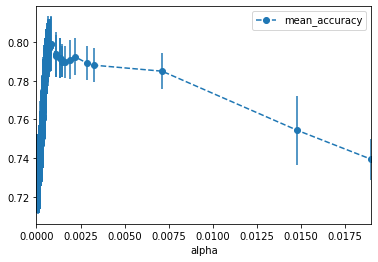

In [49]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    
    scores = cross_val_score(clf_dt, X_train, y_train, cv=10) 
    print(scores,'scores')
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
        

alpha_results = pd.DataFrame(alpha_loop_values, 
                            columns=['alpha', 'mean_accuracy','std'])
print(alpha_results.head())

#alpha_results.plot(x='alpha', y='mean_accuracy',
#                  yerr='std', marker='o', linestyle='--')

In [ ]:
alpha_results.plot(x='alpha', y='mean_accuracy',
                  yerr='std', marker='o', linestyle='--')

In [50]:
alpha_results

,alpha,mean_accuracy,std
0,0.000000,0.731875,0.020562
1,0.000021,0.731875,0.020562
2,0.000049,0.731875,0.020562
3,0.000052,0.731875,0.020562
4,0.000054,0.731875,0.020562
...,...,...,...
349,0.002864,0.789167,0.008680
350,0.003238,0.788125,0.008841
351,0.007126,0.785000,0.009354
352,0.014794,0.754375,0.018005


In [ ]:
# we choose alpha with max accuracy in 0.000-0.0025 interval

In [51]:
targeted_alphas = alpha_results[(alpha_results['alpha']>0.0000)
             & 
             (alpha_results['alpha']<0.0025)]
targeted_alphas.head()

,alpha,mean_accuracy,std
1,0.000021,0.731875,0.020562
2,0.000049,0.731875,0.020562
3,0.000052,0.731875,0.020562
4,0.000054,0.731875,0.020562
5,0.000069,0.731875,0.020562


In [52]:
max_accuracy = targeted_alphas["mean_accuracy"].max()
targeted_alphas[targeted_alphas["mean_accuracy"]==max_accuracy]

,alpha,mean_accuracy,std
338,0.000829,0.799167,0.013857
339,0.000836,0.799167,0.014289


In [53]:
ideal_ccp_alpha = targeted_alphas[targeted_alphas["mean_accuracy"]==max_accuracy]['alpha'][0:1]
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.0008286356531970532

In [54]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42,
                                       ccp_alpha= ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

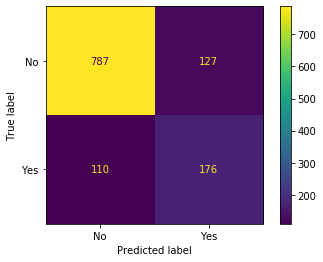

In [55]:
plot_confusion_matrix(clf_dt_pruned,
                     X_test, y_test,
                     display_labels=['No', 'Yes'])

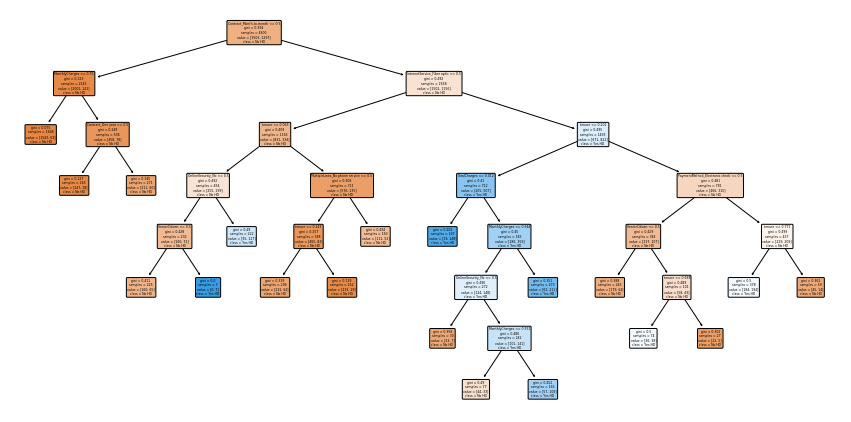

In [56]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,
         filled=True,
         rounded=True,
         class_names=['No HD', 'Yes HD'], 
         feature_names=features);

In [57]:
clf_dt_pruned.score(X_train, y_train)

0.8089583333333333

In [58]:
clf_dt_pruned.score(X_test, y_test)

0.8025

In [59]:
y_pred_DT = clf_dt_pruned.predict(X_test)
y_pred_DT

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [60]:
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred_DT, target_names=target_names))

              precision    recall  f1-score   support

          No       0.88      0.86      0.87       914
         Yes       0.58      0.62      0.60       286

    accuracy                           0.80      1200
   macro avg       0.73      0.74      0.73      1200
weighted avg       0.81      0.80      0.80      1200



In [61]:
models_stat.append(["Decision_Tree", clf_dt_pruned.score(X_train, y_train), clf_dt_pruned.score(X_test, y_test) ])
models_stat

[['Logistic_regression', 0.81, 0.8033333333333333],
 ['Decision_Tree', 0.8089583333333333, 0.8025]]

### Random Forest

In [ ]:
# this is our initial model with initial parameters, we will go step by step and find best tunning parameters for our model

In [ ]:
# first param is "n_estimators"

In [98]:
n_estimators = []
for i in range(1,50):
    random_forest = RandomForestClassifier(criterion = "gini", 
                                min_samples_leaf = 10, 
                                min_samples_split = 10,   
                                n_estimators=i, 
                                max_features='auto', 
                                oob_score=True, 
                                random_state=0, 
                                n_jobs=-1)

    random_forest.fit(X_train, y_train)
    
    n_estimators.append([i,random_forest.score(X_train, y_train), random_forest.score(X_test, y_test)])
n_estimators

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
D:\Anaconda\lib\site-packages\ipykernel_laun

[[1, 0.805625, 0.7808333333333334],
 [2, 0.816875, 0.7966666666666666],
 [3, 0.8233333333333334, 0.7983333333333333],
 [4, 0.8254166666666667, 0.7941666666666667],
 [5, 0.825, 0.8083333333333333],
 [6, 0.830625, 0.81],
 [7, 0.8304166666666667, 0.8],
 [8, 0.8345833333333333, 0.8025],
 [9, 0.8347916666666667, 0.7991666666666667],
 [10, 0.8347916666666667, 0.8041666666666667],
 [11, 0.8335416666666666, 0.8075],
 [12, 0.8335416666666666, 0.8033333333333333],
 [13, 0.8335416666666666, 0.8066666666666666],
 [14, 0.8360416666666667, 0.8041666666666667],
 [15, 0.8347916666666667, 0.8033333333333333],
 [16, 0.8325, 0.8075],
 [17, 0.8325, 0.8075],
 [18, 0.8354166666666667, 0.8116666666666666],
 [19, 0.835, 0.81],
 [20, 0.8347916666666667, 0.8083333333333333],
 [21, 0.8341666666666666, 0.8083333333333333],
 [22, 0.8341666666666666, 0.8083333333333333],
 [23, 0.8347916666666667, 0.81],
 [24, 0.8354166666666667, 0.8108333333333333],
 [25, 0.8358333333333333, 0.8075],
 [26, 0.8354166666666667, 0.811

In [99]:
df_n_estimators = pd.DataFrame(n_estimators)
df_n_estimators.head()

,0,1,2
0,1,0.805625,0.780833
1,2,0.816875,0.796667
2,3,0.823333,0.798333
3,4,0.825417,0.794167
4,5,0.825000,0.808333


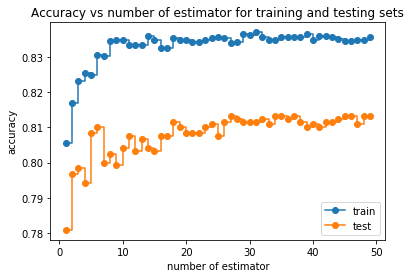

In [100]:
fig, ax = plt.subplots()
ax.set_xlabel('number of estimator')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs number of estimator for training and testing sets')
ax.plot(df_n_estimators[0], df_n_estimators[1], marker='o', label='train', drawstyle='steps-post')
ax.plot(df_n_estimators[0], df_n_estimators[2], marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [101]:
df_n_estimators[df_n_estimators[2]==df_n_estimators[2].max()][0]
ideal_n_estimator = int(df_n_estimators[df_n_estimators[2]==df_n_estimators[2].max()][0][:1])
ideal_n_estimator

27

In [ ]:
# we found ideal number of estimators 

In [ ]:
# and we can use it to see our model scores with "ideal_n_estimator"

In [102]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                min_samples_leaf = 10, 
                                min_samples_split = 10,   
                                n_estimators=ideal_n_estimator, 
                                max_features='auto', 
                                oob_score=True, 
                                random_state=0, 
                                n_jobs=-1)

random_forest.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


RandomForestClassifier(min_samples_leaf=10, min_samples_split=10,
                       n_estimators=27, n_jobs=-1, oob_score=True,
                       random_state=0)

In [103]:
random_forest.score(X_train, y_train)

0.8339583333333334

In [104]:
random_forest.score(X_test, y_test)

0.8133333333333334

In [ ]:
# next parameter for tunning is "min_samp_leaf"

In [105]:
min_samp_leaf = []
for i in range(1,50):
    random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = i, 
                                       min_samples_split = 10,   
                                       n_estimators=ideal_n_estimator, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=0, 
                                       n_jobs=-1)
    random_forest.fit(X_train, y_train)
    
    min_samp_leaf.append([i,random_forest.score(X_train, y_train), random_forest.score(X_test, y_test)])
min_samp_leaf  

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for examp

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for examp

[[1, 0.8941666666666667, 0.8116666666666666],
 [2, 0.88375, 0.8008333333333333],
 [3, 0.876875, 0.8091666666666667],
 [4, 0.8704166666666666, 0.8125],
 [5, 0.863125, 0.8083333333333333],
 [6, 0.8520833333333333, 0.7983333333333333],
 [7, 0.8475, 0.8083333333333333],
 [8, 0.8414583333333333, 0.81],
 [9, 0.8389583333333334, 0.8091666666666667],
 [10, 0.8339583333333334, 0.8133333333333334],
 [11, 0.83375, 0.81],
 [12, 0.8285416666666666, 0.8116666666666666],
 [13, 0.8285416666666666, 0.8108333333333333],
 [14, 0.8266666666666667, 0.8116666666666666],
 [15, 0.8266666666666667, 0.8108333333333333],
 [16, 0.8283333333333334, 0.8116666666666666],
 [17, 0.8252083333333333, 0.8133333333333334],
 [18, 0.823125, 0.805],
 [19, 0.8227083333333334, 0.8083333333333333],
 [20, 0.8233333333333334, 0.8058333333333333],
 [21, 0.8197916666666667, 0.815],
 [22, 0.821875, 0.81],
 [23, 0.8183333333333334, 0.8058333333333333],
 [24, 0.8185416666666666, 0.8133333333333334],
 [25, 0.8204166666666667, 0.8091666

In [106]:
df_min_samp_leaf = pd.DataFrame(min_samp_leaf)
df_min_samp_leaf.head()

,0,1,2
0,1,0.894167,0.811667
1,2,0.883750,0.800833
2,3,0.876875,0.809167
3,4,0.870417,0.812500
4,5,0.863125,0.808333


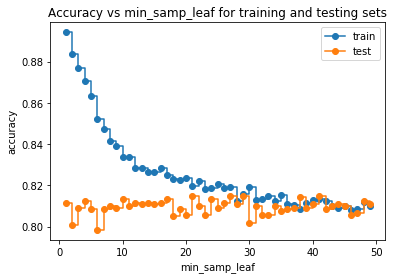

In [107]:
fig, ax = plt.subplots()
ax.set_xlabel('min_samp_leaf')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs min_samp_leaf for training and testing sets')
ax.plot(df_min_samp_leaf[0], df_min_samp_leaf[1], marker='o', label='train', drawstyle='steps-post')
ax.plot(df_min_samp_leaf[0], df_min_samp_leaf[2], marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [108]:
df_min_samp_leaf[df_min_samp_leaf[2]==df_min_samp_leaf[2].max()][0]
ideal_min_samp_leaf = int(df_min_samp_leaf[df_min_samp_leaf[2]==df_min_samp_leaf[2].max()][0][:1])
ideal_min_samp_leaf

21

In [ ]:
# we found ideal_min_samp_leaf and will use further

In [ ]:
# next param is "min_samples_split"

In [109]:
min_samples_split = []
for i in range(2,50):
    random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = ideal_min_samp_leaf, 
                                       min_samples_split = i,   
                                       n_estimators=ideal_n_estimator, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=0, 
                                       n_jobs=-1)
    random_forest.fit(X_train, y_train)
    
    min_samples_split.append([i,random_forest.score(X_train, y_train), random_forest.score(X_test, y_test)])
min_samples_split   

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for examp

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for examp

[[2, 0.8197916666666667, 0.815],
 [3, 0.8197916666666667, 0.815],
 [4, 0.8197916666666667, 0.815],
 [5, 0.8197916666666667, 0.815],
 [6, 0.8197916666666667, 0.815],
 [7, 0.8197916666666667, 0.815],
 [8, 0.8197916666666667, 0.815],
 [9, 0.8197916666666667, 0.815],
 [10, 0.8197916666666667, 0.815],
 [11, 0.8197916666666667, 0.815],
 [12, 0.8197916666666667, 0.815],
 [13, 0.8197916666666667, 0.815],
 [14, 0.8197916666666667, 0.815],
 [15, 0.8197916666666667, 0.815],
 [16, 0.8197916666666667, 0.815],
 [17, 0.8197916666666667, 0.815],
 [18, 0.8197916666666667, 0.815],
 [19, 0.8197916666666667, 0.815],
 [20, 0.8197916666666667, 0.815],
 [21, 0.8197916666666667, 0.815],
 [22, 0.8197916666666667, 0.815],
 [23, 0.8197916666666667, 0.815],
 [24, 0.8197916666666667, 0.815],
 [25, 0.8197916666666667, 0.815],
 [26, 0.8197916666666667, 0.815],
 [27, 0.8197916666666667, 0.815],
 [28, 0.8197916666666667, 0.815],
 [29, 0.8197916666666667, 0.815],
 [30, 0.8197916666666667, 0.815],
 [31, 0.81979166666666

In [110]:
df_min_samples_split = pd.DataFrame(min_samples_split)
df_min_samples_split.head()

,0,1,2
0,2,0.819792,0.815
1,3,0.819792,0.815
2,4,0.819792,0.815
3,5,0.819792,0.815
4,6,0.819792,0.815


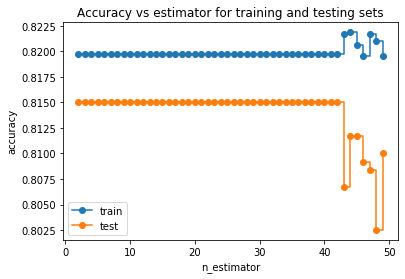

In [111]:
fig, ax = plt.subplots()
ax.set_xlabel('n_estimator')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs estimator for training and testing sets')
ax.plot(df_min_samples_split[0], df_min_samples_split[1], marker='o', label='train', drawstyle='steps-post')
ax.plot(df_min_samples_split[0], df_min_samples_split[2], marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [ ]:
# as shown in plot, we can omit this parameter

In [ ]:
# Finally we got our model with best tunning parameters

In [112]:
random_forest_final = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = ideal_min_samp_leaf,   
                                       n_estimators=ideal_n_estimator, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=0, 
                                       n_jobs=-1)
random_forest_final.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(min_samples_leaf=21, n_estimators=27, n_jobs=-1,
                       oob_score=True, random_state=0)

In [113]:
random_forest_final.score(X_train, y_train)

0.8197916666666667

In [114]:
random_forest_final.score(X_test, y_test)

0.815

In [115]:
y_pred_RF = random_forest_final.predict(X_test)
y_pred_RF

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [116]:
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred_RF, target_names=target_names))

              precision    recall  f1-score   support

          No       0.85      0.93      0.88       914
         Yes       0.66      0.46      0.54       286

    accuracy                           0.81      1200
   macro avg       0.75      0.69      0.71      1200
weighted avg       0.80      0.81      0.80      1200



In [ ]:
# Here is our models statistics

In [117]:
models_stat.append(["Random_Forest", random_forest_final.score(X_train, y_train), random_forest_final.score(X_test, y_test) ])
models_stat

[['Logistic_regression', 0.81, 0.8033333333333333],
 ['Decision_Tree', 0.8089583333333333, 0.8025],
 ['Random_Forest', 0.8197916666666667, 0.815]]